Машинсон Всеволод Валерьевич

## Эксперименты

In [1]:
from sklearn import datasets
x = datasets.fetch_openml("mnist_784")

In [18]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from knn.classification import KNNClassifier
from timeit import default_timer as timer

In [6]:
TRAIN_COUNT = 60000
X_train, y_train = x["data"][:TRAIN_COUNT], x["target"][:TRAIN_COUNT]
X_test, y_test = x["data"][TRAIN_COUNT:], x["target"][TRAIN_COUNT:]
features_count = X_train.shape[1]

## Эксперимент 2.1

Исследовать, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.
Для каждого объекта тестовой выборки найти 5 его ближайших соседей в обучающей для евклидовой
метрики. Для выборки нужно выбрать подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).
Необходимо проверить все алгоритмы поиска ближайших соседей, указанные в спецификации к заданию.

In [19]:
NEIGHBOURS_COUNT = 5
np.random.seed(117)

algorithms = ['my_own', 'brute', 'ball_tree', 'kd_tree']
features_indicies = map(lambda x: (x, np.random.choice(features_count, size=x, replace=False)), [10, 20, 100])

neighbours_time = defaultdict(list)

for features_number, indicies in features_indicies:
    X_train_reduced = X_train[:, indicies]
    X_test_reduced = X_test[:, indicies]
    
    for alg in algorithms:
        print(f'alg = {alg} features_count = {features_number}')
        clf = KNNClassifier(n_neighbors=NEIGHBOURS_COUNT, algorithm=alg, metric='euclidean', weights='uniform')
        clf.fit(X_train_reduced, y_train)
        print("Fitted")
        
        start = timer()
        neighbours = clf.kneighbors(X_test_reduced)
        end = timer()
        calc_time = end - start
        neighbours_time[alg].append((features_number, calc_time))
        print(f"neighbours time {calc_time}\n")


alg = my_own features_count = 10
Fitted
neighbours time 81.61633209899992

alg = brute features_count = 10
Fitted
neighbours time 7.611814548999973

alg = ball_tree features_count = 10
Fitted
neighbours time 2.690574928999922

alg = kd_tree features_count = 10
Fitted
neighbours time 1.3799099990001196

alg = my_own features_count = 20
Fitted
neighbours time 70.93573357800005

alg = brute features_count = 20
Fitted
neighbours time 8.133671123000113

alg = ball_tree features_count = 20
Fitted
neighbours time 9.46322449299987

alg = kd_tree features_count = 20
Fitted
neighbours time 4.080512880999777

alg = my_own features_count = 100
Fitted
neighbours time 84.9965442509997

alg = brute features_count = 100
Fitted
neighbours time 8.747766608999882

alg = ball_tree features_count = 100
Fitted
neighbours time 110.44706356699999

alg = kd_tree features_count = 100
Fitted
neighbours time 73.86115754000002



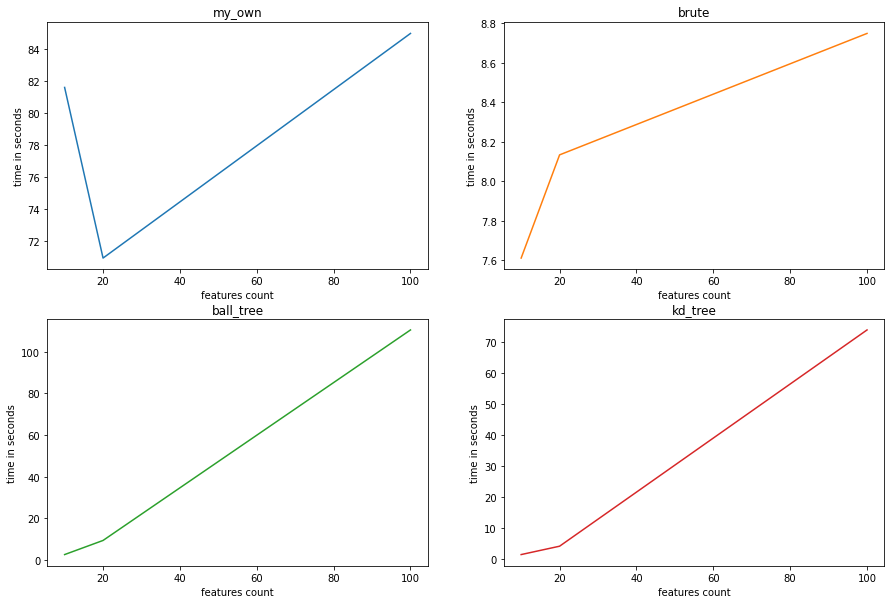

In [30]:
def algTimes(name):
    return (list(map(lambda x: x[0], neighbours_time[name])), list(map(lambda x: x[1], neighbours_time[name])))
alg_times_calculated = list(map(lambda alg_name: algTimes(alg_name), algorithms))
my_own_index, brute_index, ball_tree_index, kd_tree_index = 0, 1, 2, 3

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(alg_times_calculated[my_own_index][0], alg_times_calculated[my_own_index][1])
axs[0, 0].set_title(f'{algorithms[my_own_index]}')
axs[0, 1].plot(alg_times_calculated[brute_index][0], alg_times_calculated[brute_index][1], 'tab:orange')
axs[0, 1].set_title(f'{algorithms[brute_index]}')
axs[1, 0].plot(alg_times_calculated[ball_tree_index][0], alg_times_calculated[ball_tree_index][1], 'tab:green')
axs[1, 0].set_title(f'{algorithms[ball_tree_index]}')
axs[1, 1].plot(alg_times_calculated[kd_tree_index][0], alg_times_calculated[kd_tree_index][1], 'tab:red')
axs[1, 1].set_title(f'{algorithms[kd_tree_index]}')

for ax in axs.flat:
    ax.set(xlabel='features count', ylabel='time in seconds')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [64]:
X_train[0, features_count - 1]

0.0

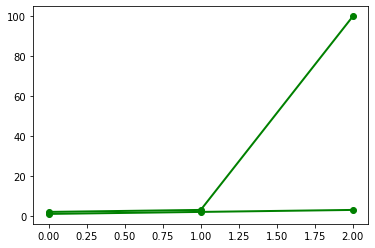

In [15]:
plt.plot([[1,2],[2,3],[3,100]], 'go-', label='line 1', linewidth=2)

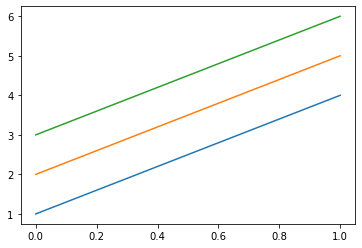

In [29]:
plt.plot(([1,2,3],[4,5,6]))

In [24]:
x.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [25]:
x['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [26]:
x['target'][:100]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
       '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
       '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
       '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
       '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
       '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
       '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
       '7', '4', '6', '8', '0', '7', '8', '3', '1'], dtype=object)

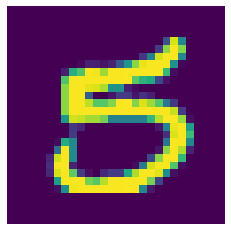

In [51]:
fig = plt.figure()
Nsample = 10
labels = list(range(10))
for y in labels:
    d = X_train[622, :]
#     for idx in range(Nsample):
#     a = fig.add_subplot(Nsample, len(labels), idx * len(labels) + y + 1)
    plt.imshow(d.reshape((28,28)))
    plt.axis('off')
    if idx == 0:
        a.set_title('{}'.format(y))

plt.show()

In [38]:
X_train[1, :]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
alg = my_own features_count = 10
Fitted
neighbours time 78.9368112090001
alg = brute features_count = 10
Fitted
neighbours time 7.697482926000021
alg = ball_tree features_count = 10
Fitted
neighbours time 2.7630715150000924
alg = kd_tree features_count = 10
Fitted
neighbours time 1.3541882800000167
alg = my_own features_count = 20
Fitted
neighbours time 74.793500215
alg = brute features_count = 20
Fitted
neighbours time 8.028423611000107
alg = ball_tree features_count = 20
Fitted
neighbours time 9.234977959999924
alg = kd_tree features_count = 20
Fitted
neighbours time 4.101594359000046
alg = my_own features_count = 100
Fitted
neighbours time 87.42398124400006
alg = brute features_count = 100
Fitted
neighbours time 8.663744576999989
alg = ball_tree features_count = 100
Fitted
neighbours time 109.52423501299995
alg = kd_tree features_count = 100
Fitted
neighbours time 73.52818073100002